# Import data 

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\asus\Instacart Basket Analysis 01-2024'

In [3]:
# import dataframe from previous Task
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

# Create a bar chart, a histogram, a scatterplot amd a line chart using a sample subset from the line chart

In [4]:
df.head()

,user_id,First Name,Surname,Gender,State,Age,Date_joined,Dependants,Family_status,income,...,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender_average,spender_flag,frequency_average,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Slowest days,Most Orders,8,New customer,7.988889,low spender,19.0,Regular customer,both


# question 3 -  provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

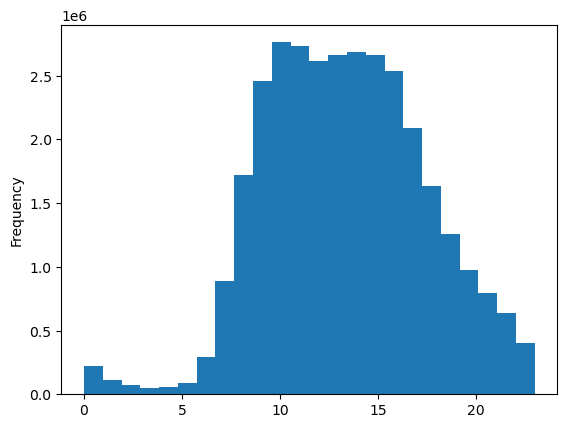

In [12]:
# Create a Histogram for staeholders based on order_hour_of_day column

hist_order_time_of_day = df['order_time_of_day'].plot.hist(bins = 24)

***NOTE: In my dataframe the "order_hour_of_day" is actually called "order_time_of_Day". We can clearly see that between the hours of 9am and 3pm, we see the most activitiy. Starting at around 4pm we see a gradual and steady drop in activity...completely dropping off after 11pm.

In [13]:
# saving histogram image into file

hist_order_time_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time_of_day.png'))

# Question 4 - Create a bar chart from the “loyalty_flag” column

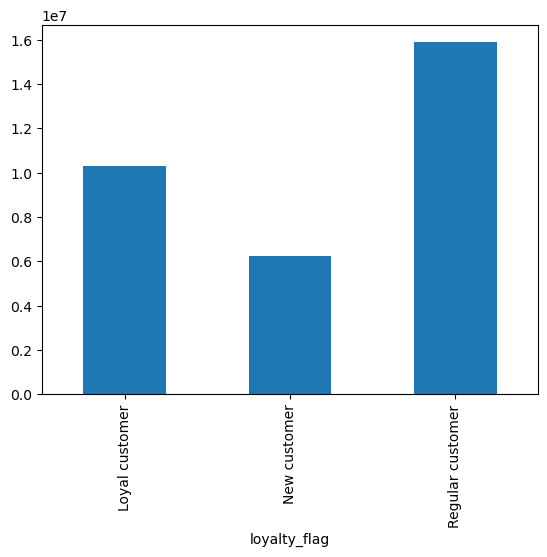

In [15]:
# creating a bar chart according to index order, not largest to smallest 

loyalty_flag_bar = df['loyalty_flag'].value_counts().sort_index().plot.bar()

Our bar chart above shows that our regular customers are the strongest when it comes to placing orders, but our loyal customers are not too far behind.

In [16]:
# saving chart image into file

loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

# Question 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [18]:
# create a list holding true/faslse values to the test np.random.rant() <= 0.7 to check possible differences in expenditures:

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
# store 70% of the sample in the dataframe Big

big = df[dev]

In [22]:
# store 30% of the sample in the dataframe small 

small = df[~dev]

In [24]:
len(df)

32404859

In [25]:
len(big)+len(small)

32404859

In [26]:
# create a new dataframe, df_2, that contains only the “prices” and “order_time_of_day” columns from your small subset

df_2 = small[['order_time_of_day','prices']]

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


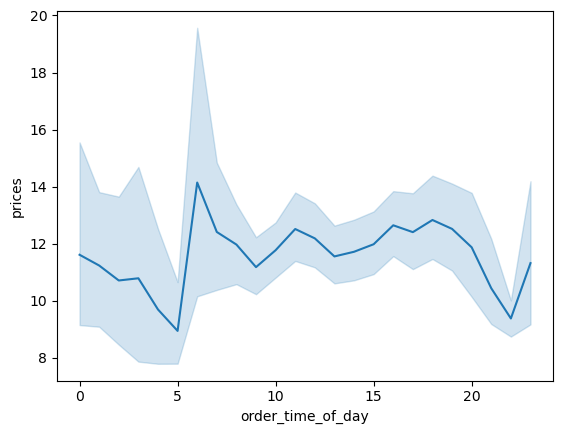

In [27]:
# creating a line chart for the 30% sample 

line_time_of_day_sample = sns.lineplot(data = df_2, x = 'order_time_of_day',y = 'prices')

We see in the chart above that there is a tendency for customers to purchase higher priced items earlier in the day

In [28]:
# saving line chart image into file

line_time_of_day_sample.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_time_of_day_sample.png'))

# Question 6 -  determine whether there’s a connection between age and family situation 

In [30]:
# create a new dataframe, df_3, that contains only the “age” and “dependants” columns from your small subset

df_3 = small[['Age','Dependants']]

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


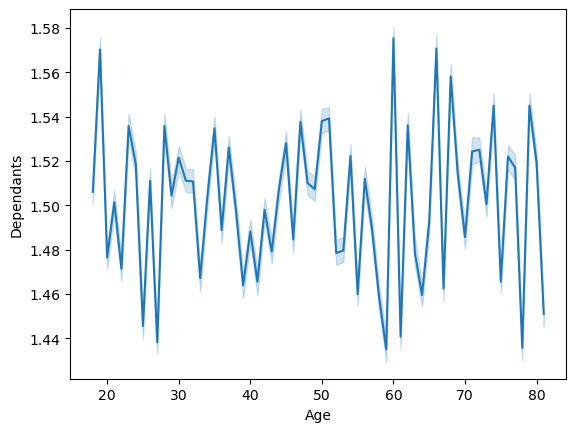

In [31]:
# create a line chart for the 30% sample to determine connection between age and dependants

line_age_dependants_sample = sns.lineplot(data = df_3, x = 'Age',y = 'Dependants')

Our line chart above shows us that there is no direct relation to the number of dependants a customer has when compared against their age. We see no clear pattern of relation. We actually see that age has no bearing on the number of dependants. One note: it was surprising to see that people under 20 and over 60 years old have the largest number of dependants. 

In [32]:
# saving line chart image into file

line_age_dependants_sample.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants_sample.png'))

# Question 7 - explore whether there’s a connection between age and spending power (income).

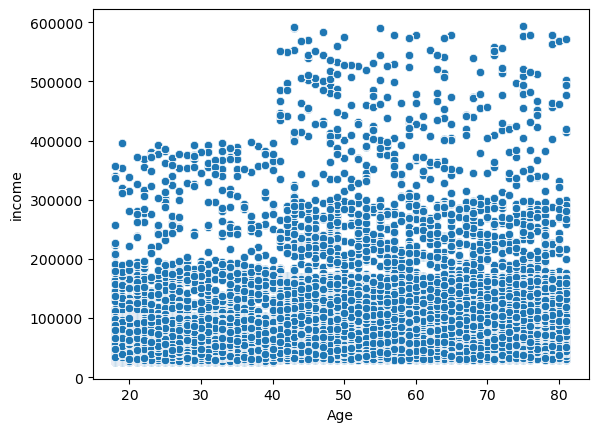

In [33]:
# using a scatterplot chart to test wheter there is a connection between age and income 

scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df)

Our scatterplot above shows us that:
## 1.incomes reach as high as 400k between the age ranges of <20 to 40. 
## 2.between the age ranges of 40 and 80, we have a fairly consistent, albeit lower, number of customers with incomes reaching up to 600k. 
## 3.the number of customers declines noticeably when we get into the 300k+ income range.
## 4.the number of customers with incomes between 200k and 300k increase dramatically at the 40 age range.

In [34]:
# saving scatterplot chart image into file

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))